In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

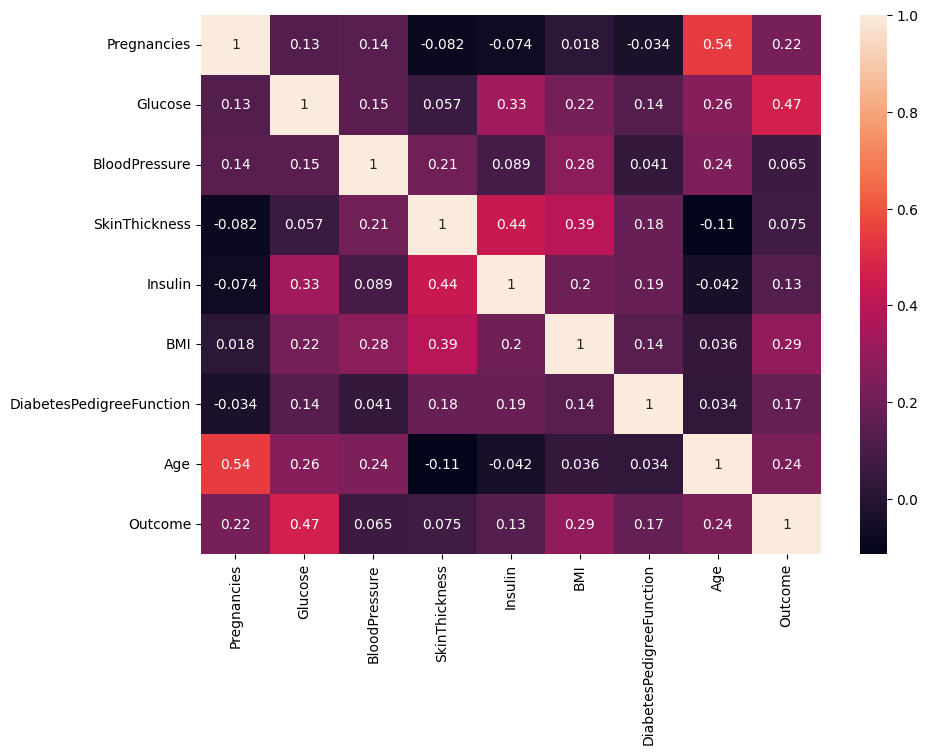

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

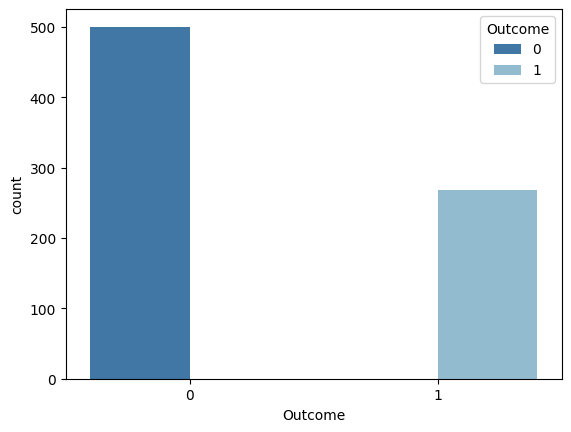

In [ ]:
sns.set_palette("RdBu_r")
sns.countplot(data=df,x='Outcome',hue='Outcome')


array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import classification_report




In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)


In [ ]:
LOGmodel=LogisticRegression(penalty='l2',solver='sag',C=0.001,random_state=33)
SVCmodel=SVC(C=1)
RFCmodel=RandomForestClassifier(max_depth=10)
GBCmodel=GradientBoostingClassifier(max_depth=10,learning_rate=1.5,random_state=20,n_estimators=500)

In [ ]:
def mm(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  #y_pred_proba=model.predict_proba(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  recal=recall_score(y_pred,y_test)
  fi_score=f1_score(y_pred,y_test)
  confusion=confusion_matrix(y_pred,y_test)
  #classification_report=classification_report(y_test,y_pred)
  sns.heatmap(confusion,annot=True)
  print('score of train is =',model.score(x_train,y_train))
  print("                                            ")
  print('score of test is =',model.score(x_test,y_test))
  print("                                            ")
  print('y predict is =',y_pred[:10])
  print("                                            ")
  print('y tese is =',y_test[:10].values)
  print("                                            ")
  print('y predict of prabo is =',y_pred)
  print("                                            ")
  #print('y predict of prabo is =',y_pred_proba)
  print('accuracy is :',accuracy,'recall is :',recal, 'fi_score is :',fi_score,"confusion_matrix is:",confusion)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


score of train is = 0.6775244299674267
                                            
score of test is = 0.7012987012987013
                                            
y predict is = [0 1 0 0 0 0 1 0 0 0]
                                            
y tese is = [1 1 0 1 0 1 1 0 0 0]
                                            
y predict of prabo is = [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0]
                                            
accuracy is : 0.7012987012987013 recall is : 0.6 fi_score is : 0.3947368421052632 confusion_matrix is: [[93 36]
 [10 15]]


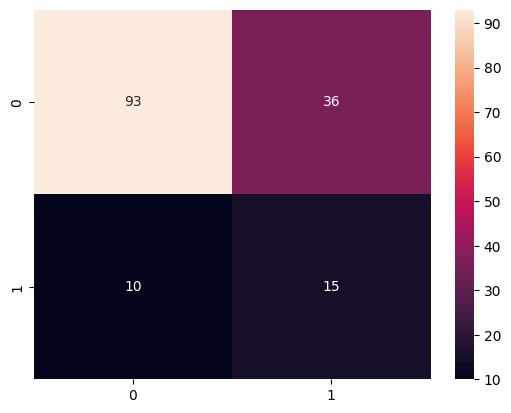

In [ ]:
mm(LOGmodel)

score of train is = 0.762214983713355
                                            
score of test is = 0.8051948051948052
                                            
y predict is = [0 1 0 0 0 1 1 0 0 0]
                                            
y tese is = [1 1 0 1 0 1 1 0 0 0]
                                            
y predict of prabo is = [0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 0]
                                            
accuracy is : 0.8051948051948052 recall is : 0.8 fi_score is : 0.6511627906976745 confusion_matrix is: [[96 23]
 [ 7 28]]


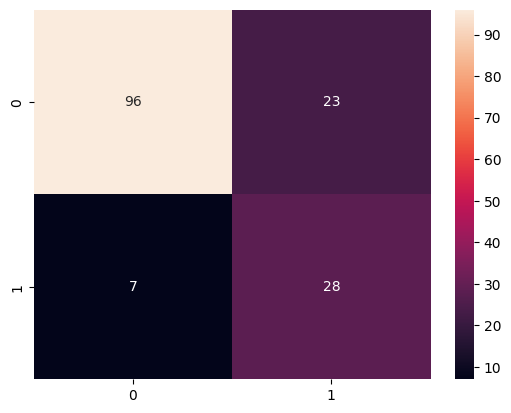

In [ ]:
mm(SVCmodel)

score of train is = 0.996742671009772
                                            
score of test is = 0.7792207792207793
                                            
y predict is = [1 1 0 0 0 1 1 0 1 0]
                                            
y tese is = [1 1 0 1 0 1 1 0 0 0]
                                            
y predict of prabo is = [1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 0]
                                            
accuracy is : 0.7792207792207793 recall is : 0.673469387755102 fi_score is : 0.66 confusion_matrix is: [[87 18]
 [16 33]]


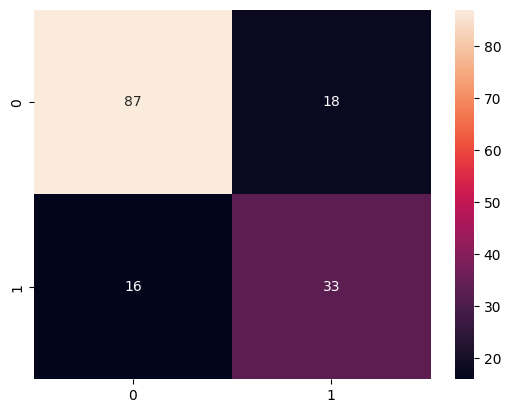

In [ ]:
mm(RFCmodel)

score of train is = 1.0
                                            
score of test is = 0.7597402597402597
                                            
y predict is = [1 1 0 0 0 1 1 0 1 0]
                                            
y tese is = [1 1 0 1 0 1 1 0 0 0]
                                            
y predict of prabo is = [1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0]
                                            
accuracy is : 0.7597402597402597 recall is : 0.6296296296296297 fi_score is : 0.6476190476190475 confusion_matrix is: [[83 17]
 [20 34]]


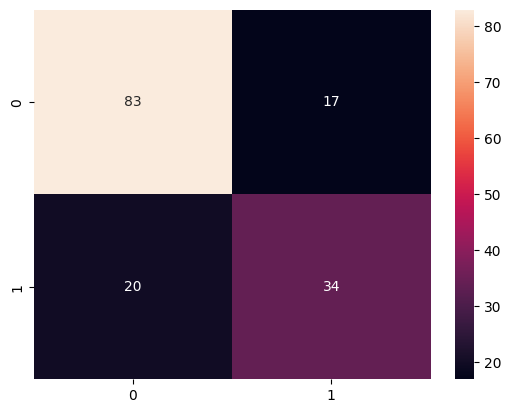

In [ ]:
mm(GBCmodel)